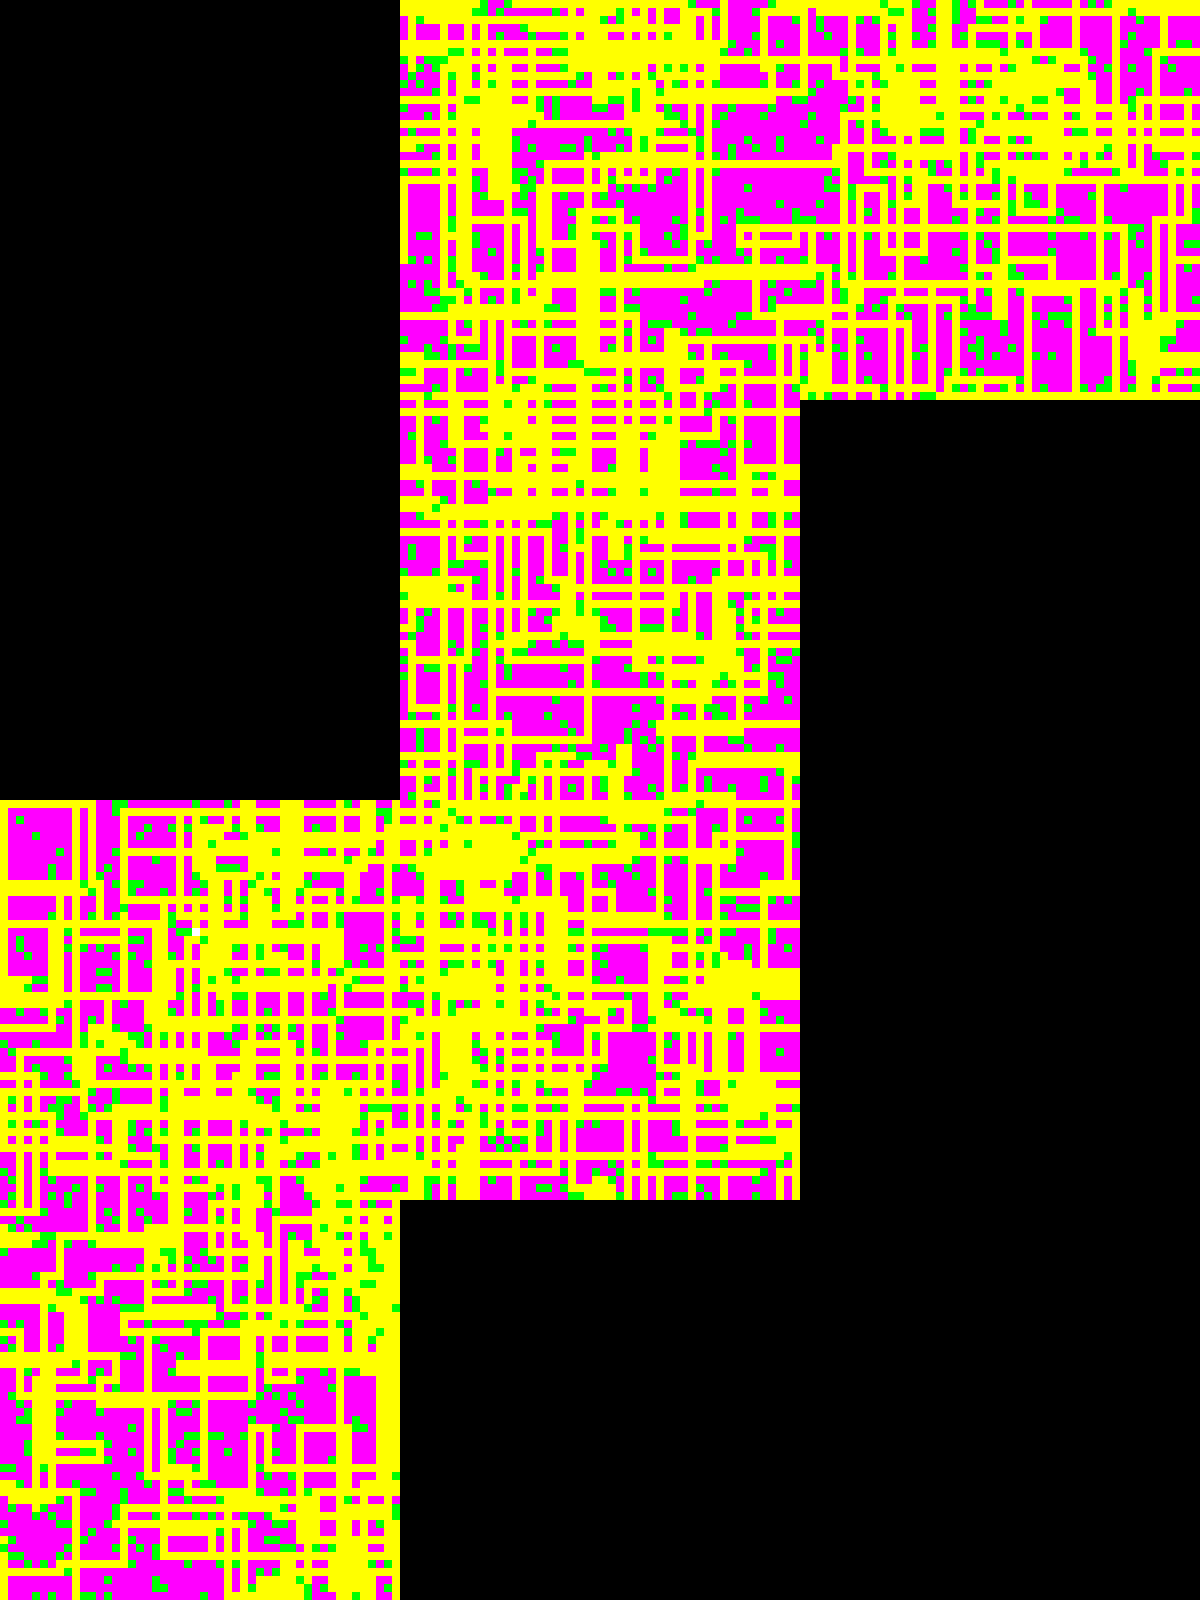

part1: 117102 117102


In [1]:
import cv2
import re
import numpy as np
from PIL import Image
from IPython import display

dirs="rdlu"
D=[[1,0],[0,1],[-1,0],[0,-1]]
    


def ld():
    a,b=open('22.txt').read().split('\n\n')
    M={}
    xx=yy=None
    for y,l in enumerate(a.split('\n')):
        for x,v in enumerate(l):
            if xx is None and v=='.':
                xx=x
                yy=y
            e={}
            e[' ']=None
            e['.']=0
            e['#']=1
            vv=e[v]
            if not vv is None:
                M[(x,y)]=vv
            
        
    return M,b,xx,yy

def dims(M):
    X=[]
    Y=[]
    for x,y in M.keys():
        X.append(x)
        Y.append(y)
        
        
    return max(X)+1,max(Y)+1
def pretty(M,pth):
    C=[[255,0,255],[0,255,0]]
    w,h=dims(M)
    pix=np.zeros([h,w,3],np.uint8)
    for p in M.keys():
        x,y=p
        pix[y,x,:]=C[M[p]]
    for x,y in pth:
        pix[y,x,:]=[255,255,0]
    x,y=pth[-1]
    pix[y,x,:]=[255,255,255]
    
    F=8
    pix = cv2.resize(pix, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    
    display.clear_output(wait=True)
    
    display.display(Image.fromarray(pix, 'RGB'))

def warp(x,y,h):
    #0-49 50-99 100-149 150-199
    #   aAabBb
    #   CaabbD
    #   aaabEb
    #   ccc
    #   FcG
    #   ccc
    #dHdeee
    #IddeeJ
    #dddeKe
    #fff
    #LfM
    #fNf
    
    #E G
    #F H
    #K M
    #C I
    #D J
    #L A
    #N B
    
    #dirs="rdlu"
    
    wps=[]
    wps.append(('AL','u',( 50, -1),( 1, 0),(  0,150),( 0, 1), 1))
    wps.append(('LA','l',( -1,150),( 0, 1),( 50,  0),( 1, 0),-1))
    
    wps.append(('CI','l',( 49,  0),( 0, 1),(  0,149),( 0,-1), 2))
    wps.append(('IC','l',( -1,100),( 0, 1),( 50, 49),( 0,-1), 2))
    
    wps.append(('DJ','r',(150,  0),( 0, 1),( 99,149),( 0,-1), 2))
    wps.append(('JD','r',(100,100),( 0, 1),(149, 49),( 0,-1), 2))
    
    wps.append(('BN','u',(100, -1),( 1, 0),(  0,199),( 1, 0), 0))
    wps.append(('NB','d',(  0,200),( 1, 0),(100,  0),( 1, 0), 0))
    
    
    wps.append(('GE','r',(100, 50),( 0, 1),(100, 49),( 1, 0),-1))
    wps.append(('EG','d',(100, 50),( 1, 0),( 99, 50),( 0, 1), 1))
    
    wps.append(('MK','r',( 50,150),( 0, 1),( 50,149),( 1, 0),-1))
    wps.append(('KM','d',( 50,150),( 1, 0),( 49,150),( 0, 1), 1))
    
    wps.append(('HF','u',( 49, 99),(-1, 0),( 50, 99),( 0,-1), 1))
    wps.append(('FH','l',( 49, 99),( 0,-1),( 49,100),(-1, 0),-1))
    
    dn=0
    for n,sh,a,da,b,db,dh in wps:
        for i in range(50):
            xx,yy=a
            dx,dy=da
            xx=xx+dx*i
            yy=yy+dy*i
            if (x,y,h)==(xx,yy,dirs.index(sh)):
                xx,yy=b
                dx,dy=db
                xx=xx+dx*i
                yy=yy+dy*i
                hh=(h+dh)%4
                #print(n,x,y,h,xx,yy,hh)
                x,y,h=xx,yy,hh
                dn=1
                break
        if dn:
            break
    return x,y,h
    
#run test cases



    
def p(prt):
    M,p,x,y=ld()
    #print(p)
    
    heading=0
    w,h=dims(M)
    #print(w,h)
    ix=0
    pth=[(x,y)]
    for d in re.split('L|R',p):
        #print("---",d)
        ix+=len(d)
        
        for z in range(int(d)):
            xx=None
            yy=None
            dx,dy=D[heading]
            xx=x+dx
            yy=y+dy
            hh=heading
            if prt==1:
                #exploit wrapping
                while not (xx,yy) in M:
                    xx=(xx+dx)%w
                    yy=(yy+dy)%h
            else:
                xx,yy,hh=warp(xx,yy,heading)
                
            #valid tile to stand on
            if M[(xx,yy)]==0:
                x=xx
                y=yy
                heading=hh
                pth.append((x,y))
                if prt==2:
                    #print(x,y)
                    #pretty(M,pth)
                    pass
        
        if ix <len(p):
            if p[ix]=='L':
                heading=(heading-1)%4
            elif p[ix]=='R':
                heading=(heading+1)%4
            else:
                print(p[ix])
                assert(0)
        ix+=1
    pretty(M,pth)
    return 1000*(y+1)+4*(x+1)+heading

print('part1:',p(1),117102)



    

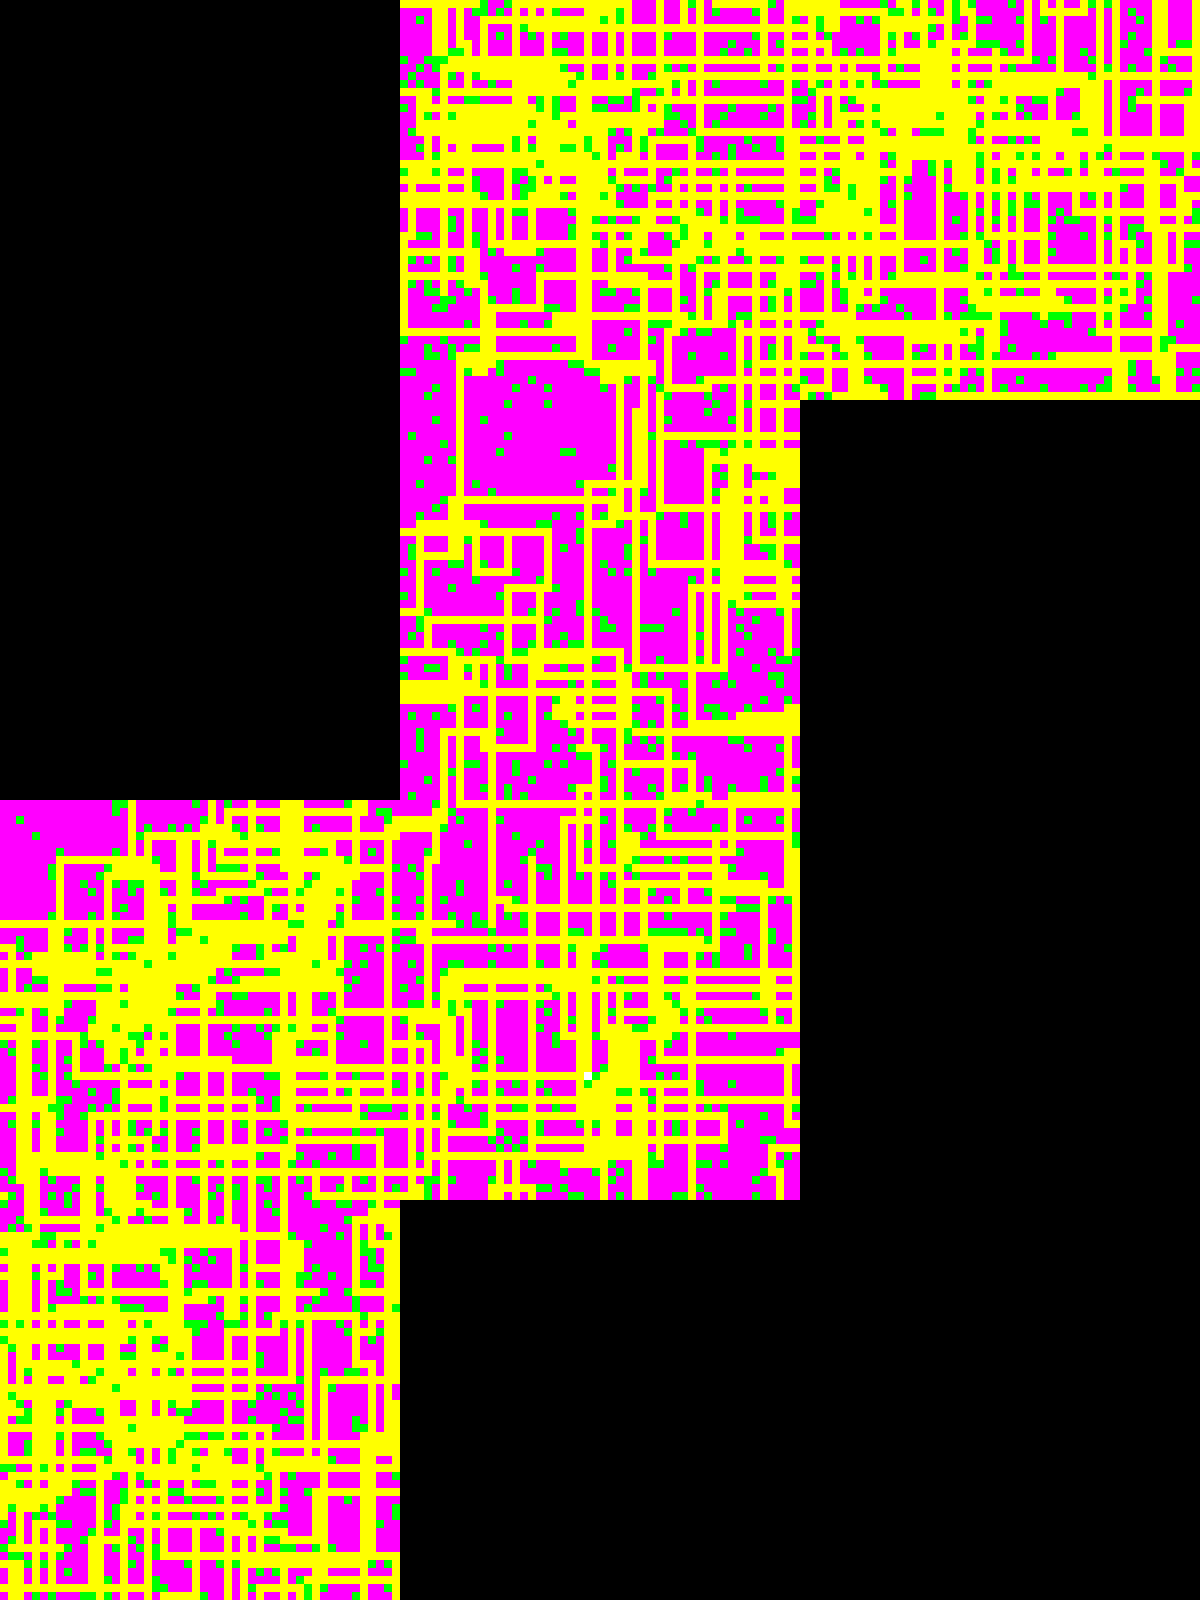

part2: 135297 135297


In [2]:
print('part2:',p(2),135297)
